In [2]:
import sys
sys.path.append("../") 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
from scripts.utilities import *
import numpy as np

pd.options.display.max_rows = 200
pd.set_option('display.max_columns', None)


# Modeling Notebook
Will be starting the modeling process in this notebook. Will tryout classification, regression, and clustering.

I will be focusing on white-box algorithms for aid in interpretability

Need to revisit how sample weights should be implemented in the model 
- https://scikit-learn.org/stable/auto_examples/svm/plot_weighted_samples.html
- https://stats.stackexchange.com/questions/362987/how-do-sample-weights-work-in-classification-models
- https://blog.davidvassallo.me/2019/12/18/machine-learning-oversampling-vs-sample-weighting/

import pandas as pd
import numpy as np
import sklearn.preprocessing

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

# Pre-processing (correlation reduction)

In [3]:
df = pd.read_csv('../data_sets/df_cleaned.csv')

In [4]:
df

,Unnamed: 0,PUMA,NP,ACCESS,BATH,BDSP,BLD,BROADBND,COMPOTHX,DIALUP,ELEFP,ELEP,FS,FULFP,GASFP,HFL,HISPEED,LAPTOP,OTHSVCEX,REFR,RMSP,RNTM,RNTP,RWAT,SATELLITE,SINK,SMARTPHONE,STOV,TABLET,TEL,TEN,VEH,WATFP,YBL,GRNTP,GRPIP,HHL,HHLANP,HHT,HINCP,HUGCL,HUPAC,HUPAOC,HUPARC,KIT,LNGI,MULTG,MV,NOC,NPP,NR,NRC,PARTNER,PLM,PSF,R18,R60,R65,RESMODE,SRNT,SSMC,WGTP_CLT,AMI,AFF_OCC,COST_BURDALL
0,0,3102,5,1.0,1,3,2,1.0,2.0,2.0,3.0,100.0,1.0,2.0,4.0,3.0,1.0,1.0,2.0,1,5,2.0,800.0,1,2.0,1,1.0,1,1.0,1.0,3.0,1.0,3.0,5,1013.0,68.0,1.0,9500.0,3.0,18000.0,0.0,3.0,3.0,3.0,1,1.0,1.0,4.0,3.0,0.0,0.0,3.0,0.0,1,0.0,1.0,1.0,1.0,2,1,0.0,200.33,1.0,3.0,1.0
1,1,3104,1,1.0,1,2,6,1.0,2.0,2.0,3.0,120.0,2.0,2.0,3.0,3.0,1.0,1.0,2.0,1,7,2.0,1100.0,1,2.0,1,1.0,1,1.0,1.0,3.0,1.0,3.0,6,1223.0,20.0,1.0,9500.0,4.0,72000.0,0.0,4.0,4.0,4.0,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,3,1,0.0,111.87,7.0,4.0,0.0
2,3,3101,2,1.0,1,3,2,1.0,2.0,2.0,3.0,170.0,2.0,2.0,4.0,1.0,2.0,2.0,2.0,1,5,2.0,600.0,1,2.0,1,1.0,1,2.0,1.0,3.0,2.0,3.0,5,883.0,19.0,1.0,9500.0,1.0,56600.0,0.0,4.0,4.0,4.0,1,1.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,2,1,0.0,90.00,5.0,2.0,0.0
3,4,3105,4,1.0,1,2,7,1.0,2.0,2.0,3.0,80.0,2.0,2.0,3.0,3.0,1.0,1.0,2.0,1,6,2.0,800.0,1,2.0,1,1.0,1,1.0,1.0,3.0,2.0,3.0,6,912.0,18.0,1.0,9500.0,1.0,59400.0,0.0,2.0,2.0,2.0,1,1.0,1.0,1.0,2.0,0.0,0.0,2.0,0.0,1,0.0,1.0,0.0,0.0,3,1,0.0,61.87,5.0,3.0,0.0
4,5,3101,1,2.0,1,0,9,1.0,2.0,2.0,3.0,30.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1,1,2.0,1400.0,1,2.0,1,1.0,1,1.0,1.0,3.0,1.0,3.0,12,1454.0,11.0,1.0,9500.0,4.0,160000.0,0.0,4.0,4.0,4.0,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,3,1,0.0,95.00,7.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1537,1749,3108,2,1.0,1,3,5,1.0,2.0,2.0,3.0,170.0,2.0,2.0,3.0,3.0,1.0,2.0,2.0,1,8,2.0,1800.0,1,2.0,1,1.0,1,1.0,1.0,3.0,3.0,2.0,18,1970.0,12.0,1.0,9500.0,1.0,204100.0,0.0,4.0,4.0,4.0,1,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,1.0,1.0,3,1,0.0,69.02,7.0,6.0,0.0
1538,1750,3107,4,1.0,1,2,8,1.0,2.0,2.0,3.0,90.0,2.0,2.0,3.0,3.0,2.0,1.0,2.0,1,8,2.0,850.0,1,2.0,1,1.0,1,1.0,1.0,3.0,1.0,3.0,7,941.0,27.0,1.0,9500.0,1.0,42000.0,0.0,1.0,1.0,1.0,1,1.0,1.0,3.0,2.0,0.0,0.0,2.0,0.0,1,0.0,1.0,0.0,0.0,3,1,0.0,56.28,3.0,3.0,0.0
1539,1751,3101,2,1.0,1,1,9,1.0,2.0,2.0,3.0,80.0,2.0,2.0,3.0,3.0,1.0,1.0,2.0,1,2,2.0,1300.0,1,2.0,1,1.0,1,2.0,1.0,3.0,2.0,3.0,19,1422.0,20.0,1.0,9500.0,5.0,86000.0,0.0,4.0,4.0,4.0,1,1.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,1,0.0,0.0,0.0,0.0,3,1,0.0,40.00,7.0,6.0,0.0
1540,1752,3101,1,1.0,1,1,7,1.0,2.0,2.0,3.0,110.0,2.0,2.0,3.0,3.0,1.0,1.0,2.0,1,3,2.0,720.0,1,2.0,1,1.0,1,1.0,1.0,3.0,1.0,1.0,1,830.0,28.0,1.0,9500.0,6.0,35100.0,0.0,4.0,4.0,4.0,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,2,1,0.0,159.00,4.0,3.0,0.0


Most of the cleaning was already completed in the last notebook... However some additional steps may be needed.

In [5]:
df.drop(columns = 'Unnamed: 0', inplace = True)

In [6]:
df.shape

(1542, 64)

In [7]:
df.isna().any()

PUMA            False
NP              False
ACCESS          False
BATH            False
BDSP            False
BLD             False
BROADBND        False
COMPOTHX        False
DIALUP          False
ELEFP           False
ELEP            False
FS              False
FULFP           False
GASFP           False
HFL             False
HISPEED         False
LAPTOP          False
OTHSVCEX        False
REFR            False
RMSP            False
RNTM            False
RNTP            False
RWAT            False
SATELLITE       False
SINK            False
SMARTPHONE      False
STOV            False
TABLET          False
TEL             False
TEN             False
VEH             False
WATFP           False
YBL             False
GRNTP           False
GRPIP           False
HHL             False
HHLANP          False
HHT             False
HINCP           False
HUGCL           False
HUPAC           False
HUPAOC          False
HUPARC          False
KIT             False
LNGI            False
MULTG     

In [8]:
df.dtypes

PUMA              int64
NP                int64
ACCESS          float64
BATH              int64
BDSP              int64
BLD               int64
BROADBND        float64
COMPOTHX        float64
DIALUP          float64
ELEFP           float64
ELEP            float64
FS              float64
FULFP           float64
GASFP           float64
HFL             float64
HISPEED         float64
LAPTOP          float64
OTHSVCEX        float64
REFR              int64
RMSP              int64
RNTM            float64
RNTP            float64
RWAT              int64
SATELLITE       float64
SINK              int64
SMARTPHONE      float64
STOV              int64
TABLET          float64
TEL             float64
TEN             float64
VEH             float64
WATFP           float64
YBL               int64
GRNTP           float64
GRPIP           float64
HHL             float64
HHLANP          float64
HHT             float64
HINCP           float64
HUGCL           float64
HUPAC           float64
HUPAOC          

Just confirming that there are no nulls and everything is a numeric value at this point

In [44]:
correlations = df.corr()

<AxesSubplot:>

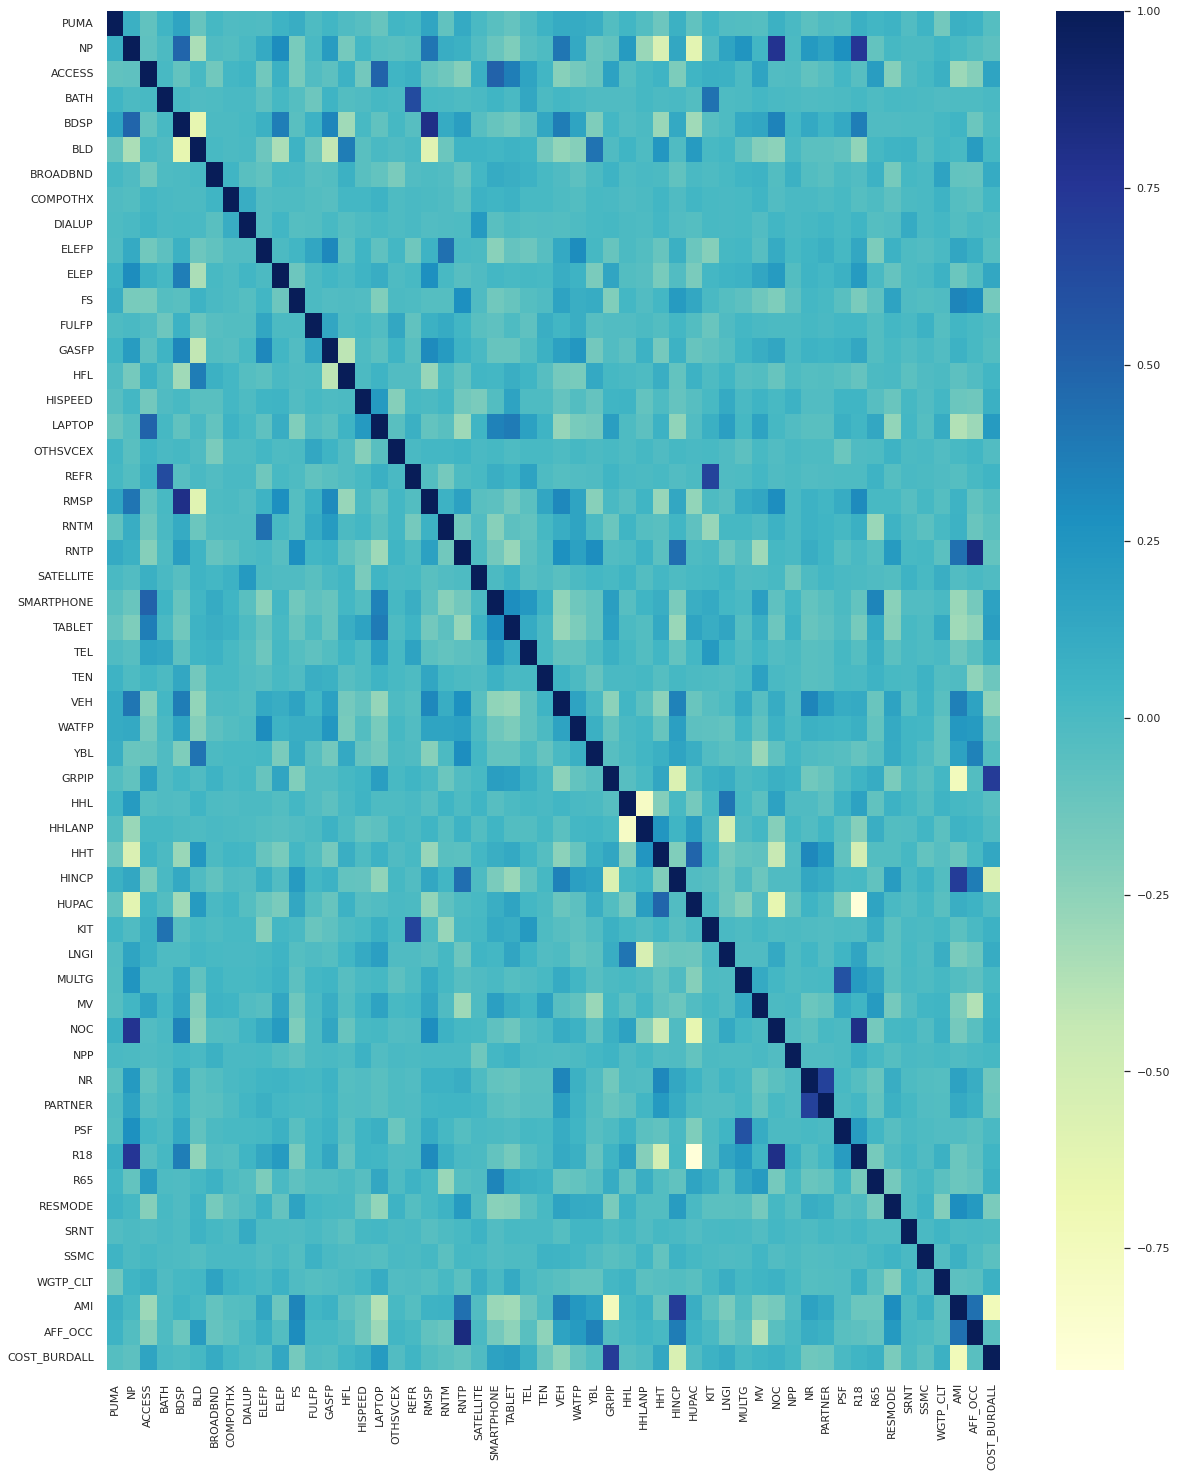

In [45]:
sns.set(rc={"figure.figsize":(20,25)})
sns.heatmap(correlations, cmap="YlGnBu", annot=False)

We can see some multi-collinearity going on. Let's remove collinear features

In [46]:
#Creating a dictionary of columns with high correlations 
corr_array = correlations.to_numpy()
high_corr = {}
cols = df.columns

for i in range(len(corr_array)):
    temp = list(np.where(corr_array[i] > 0.70)[0])
    if len(temp) < 2:
        continue
    temp.pop(temp.index(i))
    high_corr[cols[i]] = list(cols[temp])

In [47]:
high_corr

{'NP': ['NOC', 'R18'],
 'BDSP': ['RMSP'],
 'RMSP': ['BDSP'],
 'RNTP': ['AFF_OCC'],
 'GRPIP': ['COST_BURDALL'],
 'HINCP': ['AMI'],
 'NOC': ['NP', 'R18'],
 'R18': ['NP', 'NOC'],
 'AMI': ['HINCP'],
 'AFF_OCC': ['RNTP'],
 'COST_BURDALL': ['GRPIP']}

In [48]:
#Get actual correlation value and decide which to drop
for i in high_corr:
    print(i+' correlates with:')
    print(correlations.loc[i][high_corr[i]])
    print('-------------------------------')
    


NP correlates with:
NOC    0.773397
R18    0.748666
Name: NP, dtype: float64
-------------------------------
BDSP correlates with:
RMSP    0.810783
Name: BDSP, dtype: float64
-------------------------------
RMSP correlates with:
BDSP    0.810783
Name: RMSP, dtype: float64
-------------------------------
RNTP correlates with:
AFF_OCC    0.844384
Name: RNTP, dtype: float64
-------------------------------
GRPIP correlates with:
COST_BURDALL    0.718695
Name: GRPIP, dtype: float64
-------------------------------
HINCP correlates with:
AMI    0.71259
Name: HINCP, dtype: float64
-------------------------------
NOC correlates with:
NP     0.773397
R18    0.805335
Name: NOC, dtype: float64
-------------------------------
R18 correlates with:
NP     0.748666
NOC    0.805335
Name: R18, dtype: float64
-------------------------------
AMI correlates with:
HINCP    0.71259
Name: AMI, dtype: float64
-------------------------------
AFF_OCC correlates with:
RNTP    0.844384
Name: AFF_OCC, dtype: float6

- After inspects the high correlating features, I've manually compiled a list of ones to drop
- Also target features were likely derived from existing features. 
    - AFF_OCC: 'RNTP', 'GRNTP'
    - COST_BURDALL: 'GRPIP'
    - AMI: 'HINCP'


In [49]:
to_drop = ['RWAT', 'SINK', 'PLM', 'GRNTP', 'STOV', 'HUGCL', 'HUPAOC', 'HUPARC', 'NRC', 'R60']

In [50]:
df.shape

(1542, 54)

In [51]:
df.drop(columns = to_drop, inplace = True)
df.shape

KeyError: "['RWAT', 'SINK', 'PLM', 'GRNTP', 'STOV', 'HUGCL', 'HUPAOC', 'HUPARC', 'NRC', 'R60'] not found in axis"

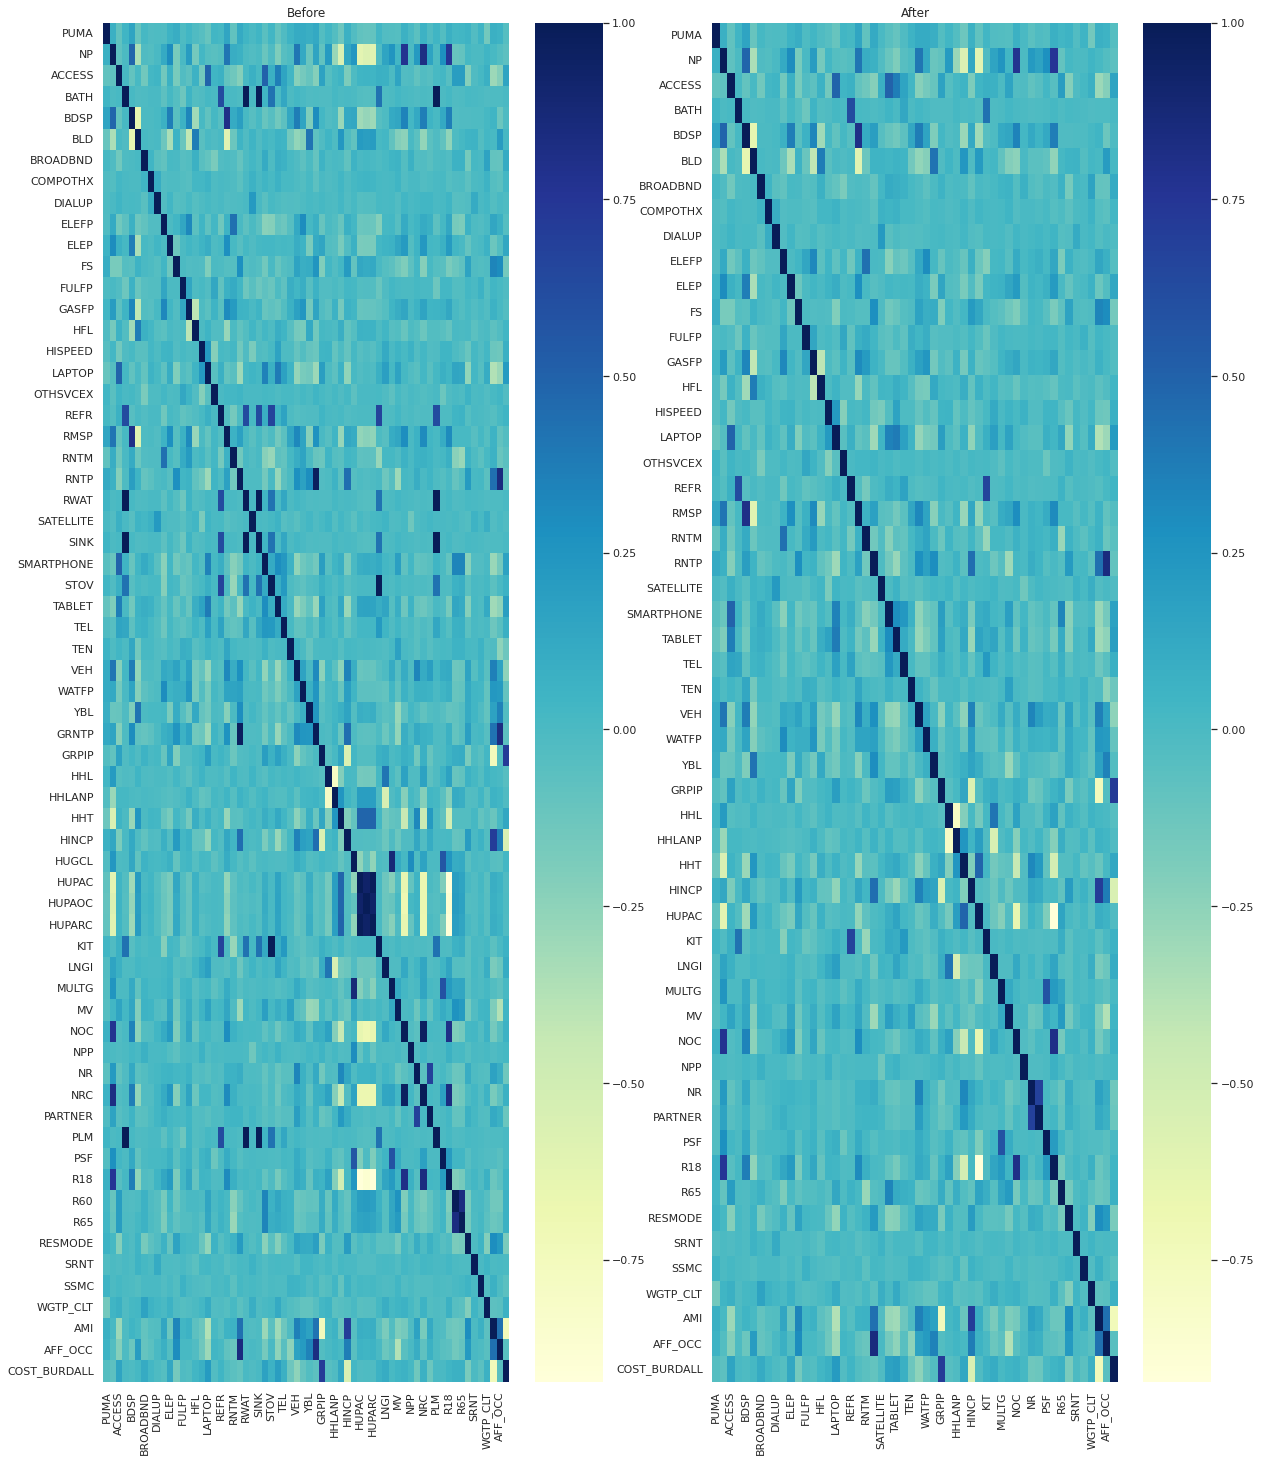

In [17]:
correlations2 = df.corr()
fig, (ax1, ax2) = plt.subplots(1,2)
sns.heatmap(correlations, cmap="YlGnBu", annot=False, ax=ax1).set(title = 'Before')
sns.heatmap(correlations2, cmap="YlGnBu", annot=False, ax=ax2).set(title = 'After')
plt.show()

# Model Implementation: Classification on COST_BURDALL

Our target for classifcation will be COST_BURDALL. This feature is a binary value representing wether or not a household is cost burdened. I will be implementing "white-box" algorithms such as decision trees and logistic regression for the sake of model transparency. 

!pip install pycaret

In [20]:
from pycaret.classification import *

In [21]:
df_classification = df.drop(columns = ['GRPIP', 'AFF_OCC', 'AMI'])

In [22]:
df_classification.shape

(1542, 51)

In [23]:
clf = setup(data=df_classification, target = 'COST_BURDALL')

,Description,Value
0,session_id,4734
1,Target,COST_BURDALL
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(1542, 51)"
5,Missing Values,False
6,Numeric Features,20
7,Categorical Features,30
8,Ordinal Features,False
9,High Cardinality Features,False


In [24]:
# compare all models cause why not
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9472,0.9928,0.9302,0.9500,0.9394,0.8926,0.8936,0.0150
gbc,Gradient Boosting Classifier,0.9463,0.9888,0.9388,0.9402,0.9389,0.8909,0.8918,0.0360
ada,Ada Boost Classifier,0.9462,0.9858,0.9324,0.9451,0.9384,0.8907,0.8912,0.0200
lr,Logistic Regression,0.9453,0.9793,0.9387,0.9375,0.9376,0.8889,0.8897,0.2870
dt,Decision Tree Classifier,0.9156,0.9135,0.8965,0.9122,0.9034,0.8285,0.8300,0.0030
rf,Random Forest Classifier,0.8776,0.9430,0.8734,0.8523,0.8622,0.7522,0.7531,0.0490
knn,K Neighbors Classifier,0.8582,0.9231,0.8460,0.8354,0.8391,0.7124,0.7146,0.1210
ridge,Ridge Classifier,0.8202,0.0000,0.7913,0.8032,0.7944,0.6349,0.6382,0.0030
svm,SVM - Linear Kernel,0.8172,0.0000,0.8303,0.8260,0.8007,0.6361,0.6708,0.0040
nb,Naive Bayes,0.8146,0.8754,0.8801,0.7463,0.8067,0.6311,0.6410,0.0040


I am very impressed by the results... 

## Random Forest

In [25]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8519,0.9356,0.8333,0.8333,0.8333,0.7000,0.7000
1,0.8796,0.9252,0.8750,0.8571,0.8660,0.7568,0.7569
2,0.9074,0.9708,0.9167,0.8800,0.8980,0.8133,0.8138
3,0.8704,0.9536,0.8750,0.8400,0.8571,0.7386,0.7391
4,0.8796,0.9063,0.8511,0.8696,0.8602,0.7545,0.7547
5,0.8796,0.9386,0.8511,0.8696,0.8602,0.7545,0.7547
6,0.8704,0.9529,0.8936,0.8235,0.8571,0.7389,0.7409
7,0.8889,0.9644,0.9362,0.8302,0.8800,0.7772,0.7821
8,0.8981,0.9634,0.8936,0.8750,0.8842,0.7933,0.7935


In [26]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9167,0.9788,0.9375,0.8824,0.9091,0.8323,0.8336
1,0.9074,0.9816,0.8958,0.8958,0.8958,0.8125,0.8125
2,0.9537,0.9920,0.9375,0.9574,0.9474,0.9061,0.9062
3,0.8981,0.9861,0.9583,0.8364,0.8932,0.7967,0.8035
4,0.9537,0.9976,0.8936,1.0000,0.9438,0.9047,0.9088
5,0.9537,0.9895,0.9149,0.9773,0.9451,0.9051,0.9066
6,0.8889,0.9705,0.8936,0.8571,0.8750,0.7751,0.7756
7,0.9630,0.9916,0.9787,0.9388,0.9583,0.9250,0.9257
8,0.9444,0.9916,0.9149,0.9556,0.9348,0.8864,0.8871


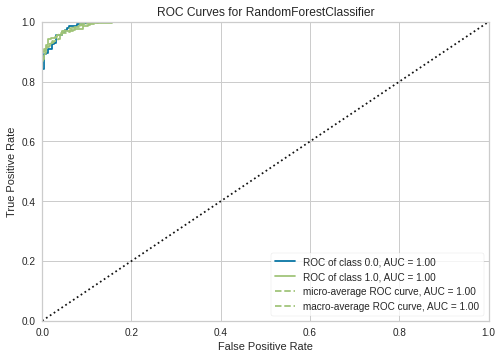

In [27]:
plot_model(tuned_rf, plot = 'auc')

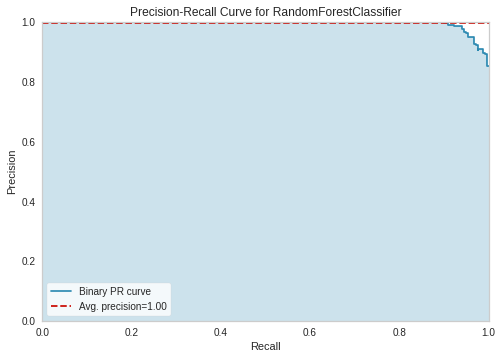

In [28]:
plot_model(tuned_rf, plot = 'pr')

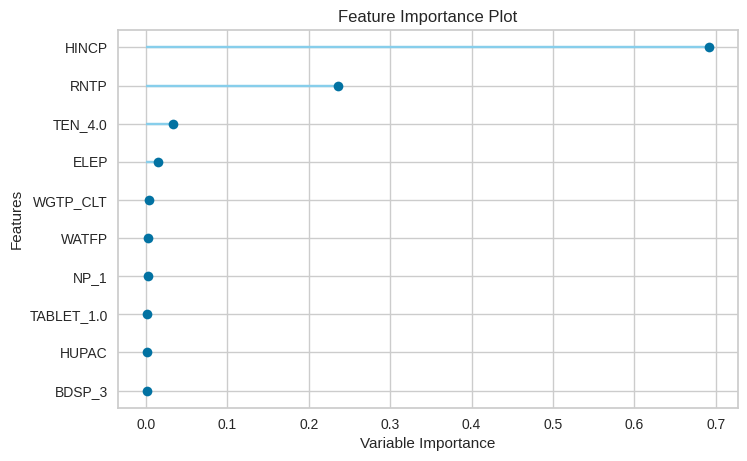

In [29]:
plot_model(tuned_rf, plot = 'feature')

In [31]:
!pip install shap

     |████████████████████████████████| 567 kB 2.5 MB/s eta 0:00:01


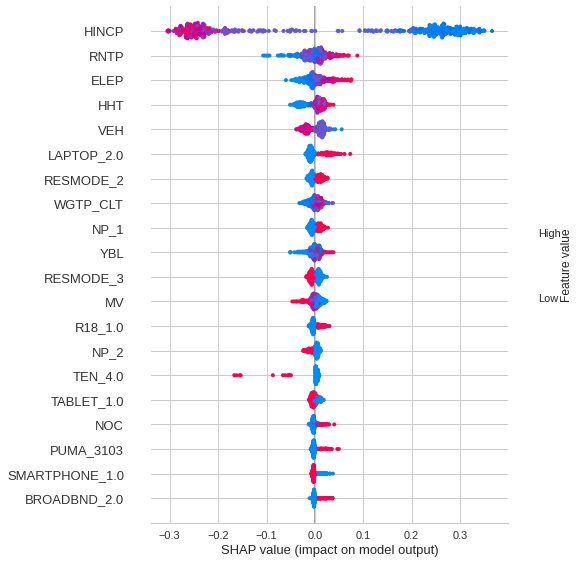

In [32]:
interpret_model(rf)

**NOTE**: These plots show correlation but not necessarily causation
- https://shap.readthedocs.io/en/latest/example_notebooks/overviews/Be%20careful%20when%20interpreting%20predictive%20models%20in%20search%20of%20causal%C2%A0insights.html


Very intuitively, the model emphasized Household Income (HINCP) and Monthly Rent (RNTP) to determine if a household is cost_burdened. Coming in thurd however, Tenure (TEN) is interesting to see. It specifies wether or not a tenant is renting or owning, or owning with a loan.

## Logistic Regression

In [33]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9537,0.9861,1.0000,0.9057,0.9505,0.9072,0.9111
1,0.9444,0.9889,0.9375,0.9375,0.9375,0.8875,0.8875
2,0.9352,0.9465,0.9375,0.9184,0.9278,0.8690,0.8692
3,0.9537,0.9910,0.9583,0.9388,0.9485,0.9064,0.9066
4,0.9259,0.9941,0.8723,0.9535,0.9111,0.8478,0.8503
5,0.9444,0.9944,0.9149,0.9556,0.9348,0.8864,0.8871
6,0.9444,0.9714,0.9362,0.9362,0.9362,0.8870,0.8870
7,0.9352,0.9777,0.9149,0.9348,0.9247,0.8678,0.8680
8,0.9630,0.9843,0.9574,0.9574,0.9574,0.9247,0.9247


In [34]:
evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

Some rather different features were selected for their importantance under the Logistic Regression model

How does "tuning" affect feature importance?

In [35]:
lr_tuned = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9444,0.9861,1.0000,0.8889,0.9412,0.8889,0.8944
1,0.9259,0.9833,0.9375,0.9000,0.9184,0.8506,0.8512
2,0.9444,0.9497,0.9583,0.9200,0.9388,0.8880,0.8886
3,0.9722,0.9920,1.0000,0.9412,0.9697,0.9441,0.9456
4,0.9722,0.9979,0.9574,0.9783,0.9677,0.9434,0.9435
5,0.9722,0.9969,0.9362,1.0000,0.9670,0.9431,0.9446
6,0.9722,0.9808,0.9787,0.9583,0.9684,0.9436,0.9438
7,0.9259,0.9777,0.9149,0.9149,0.9149,0.8493,0.8493
8,0.9630,0.9843,0.9574,0.9574,0.9574,0.9247,0.9247


In [36]:
evaluate_model(lr_tuned)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## LightGBM

In [37]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9352,0.9906,0.9583,0.9020,0.9293,0.8696,0.8709
1,0.9444,0.9920,0.9167,0.9565,0.9362,0.8870,0.8877
2,0.9815,0.9944,0.9583,1.0000,0.9787,0.9623,0.9630
3,0.9352,0.9955,0.9583,0.9020,0.9293,0.8696,0.8709
4,0.9630,0.9993,0.9149,1.0000,0.9556,0.9239,0.9266
5,0.9444,0.9930,0.8936,0.9767,0.9333,0.8859,0.8885
6,0.9074,0.9787,0.8936,0.8936,0.8936,0.8116,0.8116
7,0.9722,0.9965,0.9787,0.9583,0.9684,0.9436,0.9438
8,0.9444,0.9962,0.9149,0.9556,0.9348,0.8864,0.8871


In [38]:
evaluate_model(lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

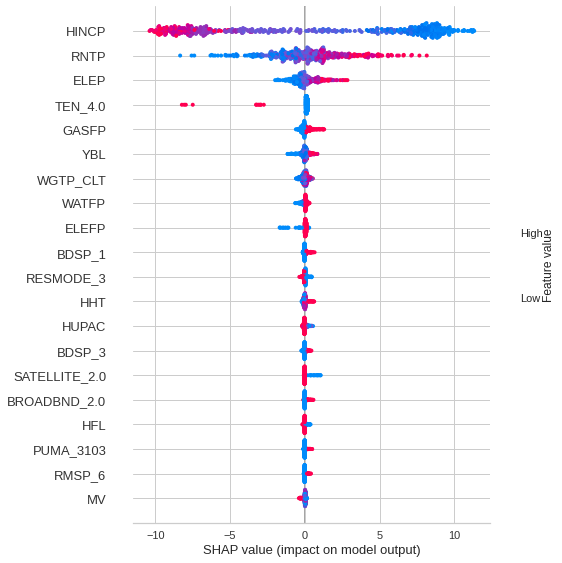

In [39]:
interpret_model(lightgbm)

In [40]:
lightgbm_tuned = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9630,0.9847,0.9792,0.9400,0.9592,0.9253,0.9260
1,0.9259,0.9740,0.9167,0.9167,0.9167,0.8500,0.8500
2,0.9630,0.9924,0.9583,0.9583,0.9583,0.9250,0.9250
3,0.9259,0.9872,0.9375,0.9000,0.9184,0.8506,0.8512
4,0.9444,0.9983,0.8723,1.0000,0.9318,0.8853,0.8912
5,0.9537,0.9941,0.9362,0.9565,0.9462,0.9056,0.9058
6,0.9074,0.9731,0.9362,0.8627,0.8980,0.8135,0.8157
7,0.9722,0.9934,1.0000,0.9400,0.9691,0.9439,0.9454
8,0.9630,0.9941,0.9362,0.9778,0.9565,0.9243,0.9250


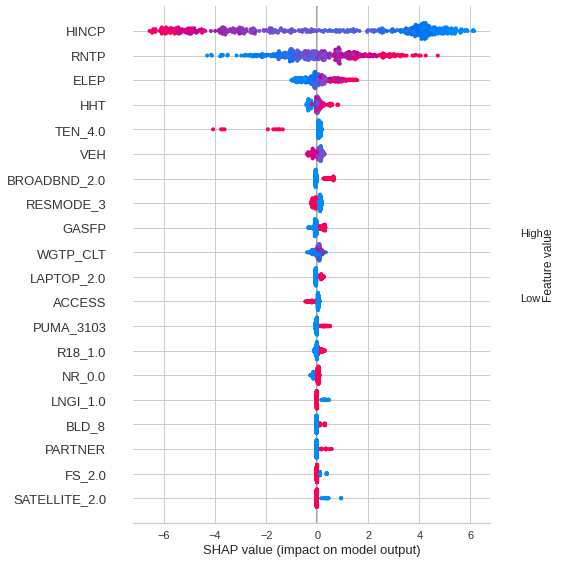

In [41]:
interpret_model(lightgbm_tuned)

Light GBM emphasizes 

## Compare Models with HINCP dropped

In [42]:
df_temp = df_classification.drop(columns = 'HINCP')

In [43]:
clf3 = setup(data=df_temp, target = 'COST_BURDALL')

,Description,Value
0,session_id,1936
1,Target,COST_BURDALL
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(1542, 50)"
5,Missing Values,False
6,Numeric Features,19
7,Categorical Features,30
8,Ordinal Features,False
9,High Cardinality Features,False


[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 

In [35]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.6803,0.0000,0.6132,0.6606,0.6347,0.3515,0.3532,0.0210
gbc,Gradient Boosting Classifier,0.6793,0.7396,0.5885,0.6673,0.6243,0.3468,0.3496,0.1410
lda,Linear Discriminant Analysis,0.6784,0.7376,0.6254,0.6537,0.6380,0.3492,0.3505,0.0320
lr,Logistic Regression,0.6747,0.7421,0.5929,0.6596,0.6225,0.3387,0.3416,0.3120
nb,Naive Bayes,0.6673,0.7028,0.5887,0.6473,0.6153,0.3238,0.3258,0.0190
ada,Ada Boost Classifier,0.6655,0.7270,0.6050,0.6401,0.6217,0.3224,0.3231,0.0970
lightgbm,Light Gradient Boosting Machine,0.6571,0.7222,0.5927,0.6303,0.6105,0.3050,0.3057,0.0670
rf,Random Forest Classifier,0.6432,0.7084,0.5358,0.6235,0.5744,0.2715,0.2745,0.2190
et,Extra Trees Classifier,0.6349,0.6842,0.5542,0.6067,0.5769,0.2580,0.2598,0.1910
dt,Decision Tree Classifier,0.5635,0.5601,0.5216,0.5211,0.5204,0.1202,0.1206,0.0180


Accuracy is significantly worse without the Household Income metric.

**Because of insights developed from the modeling about feature importance, we can explore plots regarding this.**

Answer questions such as 
- **At what rent / price do apartments become cost burdened?** 
- **At what income level does a house hold become cost burdened?** 

But how do we answer these questions? We could plot the distribution of Monthly Rent and Overlay color = "COST_BURDALL" on top of this to see at what rent point do households begin to be cost_burdened

In [59]:
alt.Chart(df).mark_bar().encode(
        alt.X('RNTP', bin = True),
        y='count()',
        color = 'COST_BURDALL:N'
    ).properties(title = "RNTP Distribution").interactive()

alt.Chart(...)

What does this plot tell us? Well, there is not a clear cut off point for COST_BURDALL being true or false. However, we can bin Rent and see the proportion of COST_BURDALL = 0 or 1 in each bin. Then we could see how this proportion increases or decreases as rent changes. **Regression on Rent vs. Cost_Burdall??** 

# Regression on Rent

# Regression on Affordability

In [52]:
df

,PUMA,NP,ACCESS,BATH,BDSP,BLD,BROADBND,COMPOTHX,DIALUP,ELEFP,...,PSF,R18,R65,RESMODE,SRNT,SSMC,WGTP_CLT,AMI,AFF_OCC,COST_BURDALL
0,3102,5,1.0,1,3,2,1.0,2.0,2.0,3.0,...,0.0,1.0,1.0,2,1,0.0,200.33,1.0,3.0,1.0
1,3104,1,1.0,1,2,6,1.0,2.0,2.0,3.0,...,0.0,0.0,0.0,3,1,0.0,111.87,7.0,4.0,0.0
2,3101,2,1.0,1,3,2,1.0,2.0,2.0,3.0,...,0.0,0.0,0.0,2,1,0.0,90.00,5.0,2.0,0.0
3,3105,4,1.0,1,2,7,1.0,2.0,2.0,3.0,...,0.0,1.0,0.0,3,1,0.0,61.87,5.0,3.0,0.0
4,3101,1,2.0,1,0,9,1.0,2.0,2.0,3.0,...,0.0,0.0,0.0,3,1,0.0,95.00,7.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1537,3108,2,1.0,1,3,5,1.0,2.0,2.0,3.0,...,0.0,0.0,1.0,3,1,0.0,69.02,7.0,6.0,0.0
1538,3107,4,1.0,1,2,8,1.0,2.0,2.0,3.0,...,0.0,1.0,0.0,3,1,0.0,56.28,3.0,3.0,0.0
1539,3101,2,1.0,1,1,9,1.0,2.0,2.0,3.0,...,0.0,0.0,0.0,3,1,0.0,40.00,7.0,6.0,0.0
1540,3101,1,1.0,1,1,7,1.0,2.0,2.0,3.0,...,0.0,0.0,0.0,2,1,0.0,159.00,4.0,3.0,0.0
